In [1]:
import numpy as np
import matplotlib.pyplot as plt

## plot matrix size speedup

In [20]:
m100 = [1, 0.8347940403, 0.8004201681]
m200 = [1, 0.9831747881, 0.7876509928]
m500 = [1, 0.9690277512, 1.003777716]
m800 = [1, 1.023715169, 0.9953554526]
m1000 = [1, 0.9961292407, 1.00427649]
thread_label = [1, 2, 4]
x = np.arange(len(thread_label))  # the label locations

Text(0.5, 0.98, 'SpeedUp vs Thread')

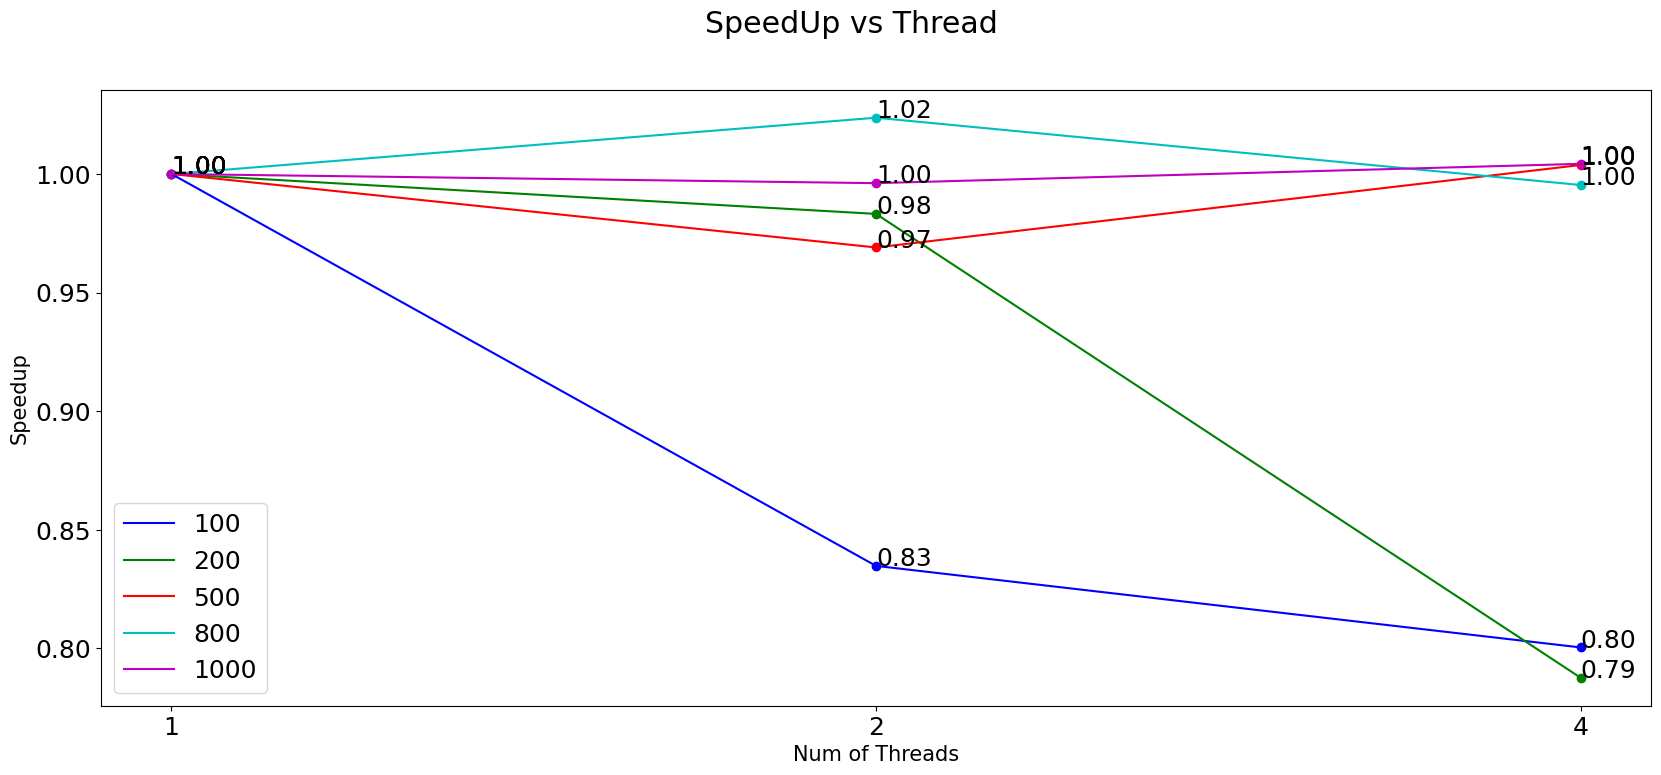

In [19]:
cmap=['b','g','r','c','m','y','k','blueviolet','chartreuse']
def fit(ax,xdata,ydata,cmap,cindex,label):
    ax.scatter(xdata,ydata,color=cmap[cindex])
    ax.plot(xdata,ydata,color=cmap[cindex],label=label)
    for i in range(len(xdata)):
        ax.annotate('%.2f'%ydata[i], (xdata[i], ydata[i]))

fig,ax=plt.subplots(1,1,figsize=(20,8)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
label=""
data_frame=None

fit(ax, x, m100,cmap,0, "100")
fit(ax, x, m200,cmap,1, "200")
fit(ax, x, m500,cmap,2,  "500")
fit(ax, x, m800,cmap,3, "800")
fit(ax, x, m1000,cmap,4, "1000")
ax.set_xticks(x, thread_label)
ax.legend()

plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Speedup",fontsize=15) # y labels
ax.set_xlabel("Num of Threads",fontsize=15) # x labels
plt.suptitle("SpeedUp vs Thread")

## plot sync and imbalance

In [2]:
# parallel_region_ratio: parallel region time / total time, for scaling check
# overhead_ratio: overhead/parallel region time, for sync check
# sync_ratio: symc/parallel region, for sync check
# sync_ratio+overhead_ratio, for work region check
# Order: balance, dynamic, imbalance

In [8]:
labels = ["balance", "dynamic", "imbalance"]
parallel_region_ratio = [0.880522601325917, 0.9956221494690619, 0.7206211886335044]
overhead_ratio = [0.0007545765131927178, 3.1592280850280876e-05, 0.0019659265331285615]
sync_ratio = [0.22971475453325016, 1.5632273144297686e-05, 0.30167970743884875]

In [9]:
work_ratio = 1 - np.array(overhead_ratio) - np.array(sync_ratio)

In [10]:
work_ratio

array([0.76953067, 0.99995278, 0.69635437])

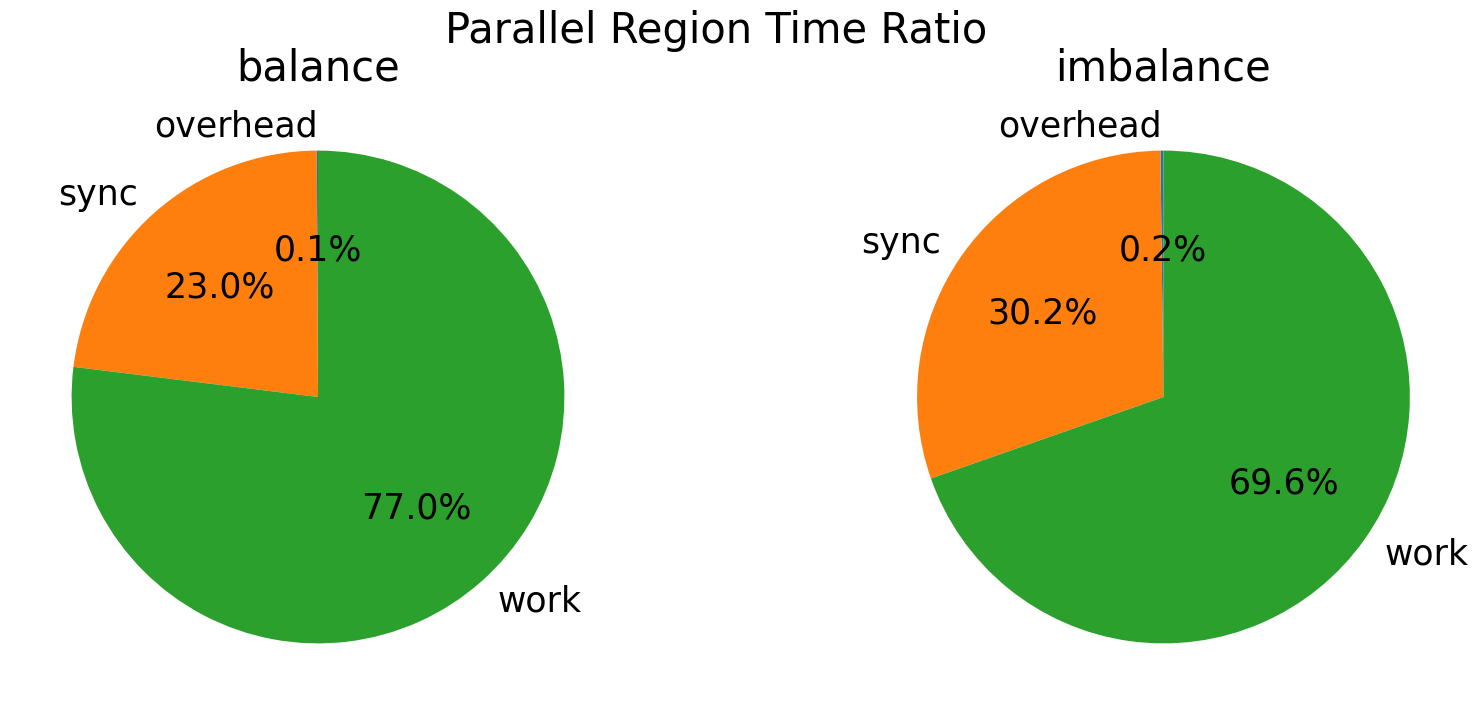

In [12]:
pie_label = ["overhead", "sync", "work"]
balance_pie = [overhead_ratio[0], sync_ratio[0], work_ratio[0]]
imbalance_pie = [overhead_ratio[2], sync_ratio[2], work_ratio[2]]
# draw two pie plot in a subplot figure
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
plt.rcParams.update({'font.size': 25}) # font size
ax[0].pie(balance_pie, labels=pie_label, autopct='%1.1f%%', startangle=90)
ax[0].set_title("balance")
ax[1].pie(imbalance_pie, labels=pie_label, autopct='%1.1f%%', startangle=90)
ax[1].set_title("imbalance")
plt.suptitle("Parallel Region Time Ratio")
plt.show()
